                 Name : Suryal D . Khirade
                 Roll NO: T190424399
                 Assignment No :06
                    

# Data Analytics III
1. Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall 
on the given dataset

# Step 1: # Import the required libraries

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step2: import dataset and convert it to dataframe

In [2]:
iris=pd.read_csv("C:\\Users\\alisu\\Desktop\\SIT lonvala\\TE\\6th sem\\DSBDA\\LAB\\Iris.csv")

In [3]:
iris


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Step3: data wrangling/preprocessing

In [4]:
iris.info() ## to check missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris.isnull().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
iris.Species.value_counts()


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
iris.tail(60)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
90,91,5.5,2.6,4.4,1.2,Iris-versicolor
91,92,6.1,3.0,4.6,1.4,Iris-versicolor
92,93,5.8,2.6,4.0,1.2,Iris-versicolor
93,94,5.0,2.3,3.3,1.0,Iris-versicolor
94,95,5.6,2.7,4.2,1.3,Iris-versicolor
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor
99,100,5.7,2.8,4.1,1.3,Iris-versicolor


In [8]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
iris.duplicated().sum()

0

In [10]:
##Finding outliers

<Axes: >

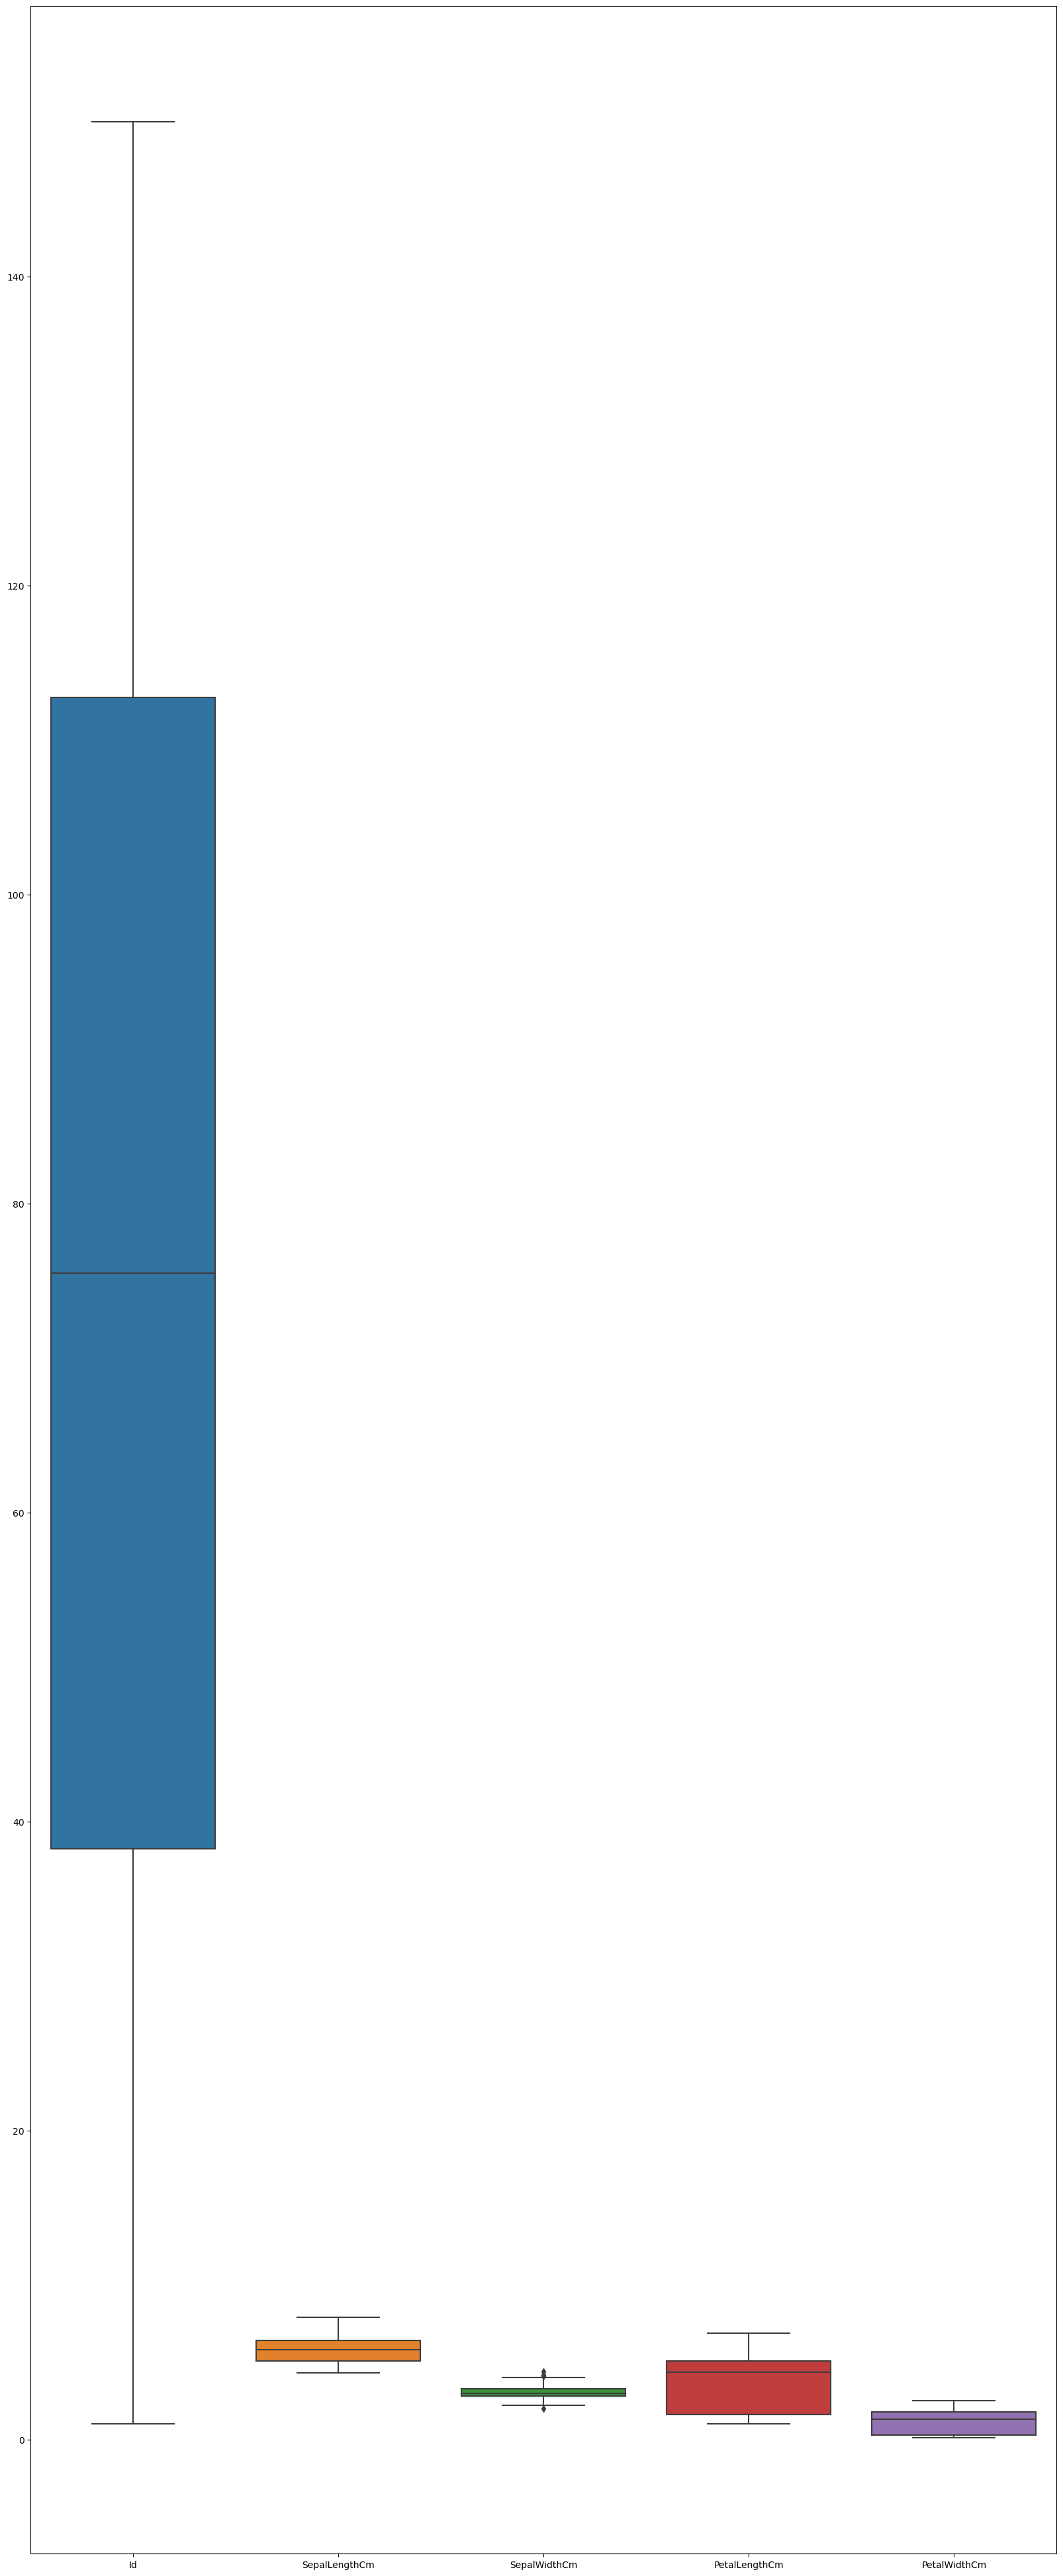

In [11]:
plt.figure(figsize=(20,50))
sns.boxplot(iris)

<Axes: >

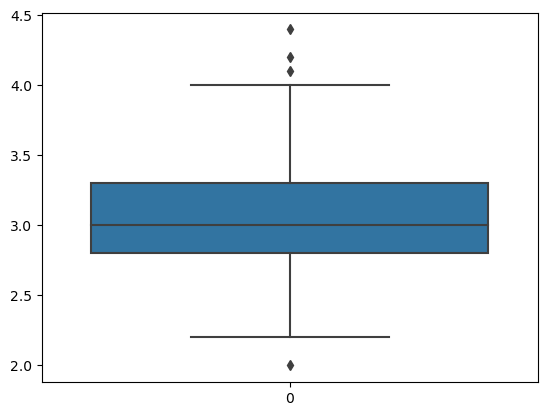

In [12]:
sns.boxplot(iris.SepalWidthCm)


C:\Users\alisu\AppData\Local\Temp\ipykernel_9460\3103411925.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iris.SepalWidthCm)


<Axes: xlabel='SepalWidthCm', ylabel='Density'>

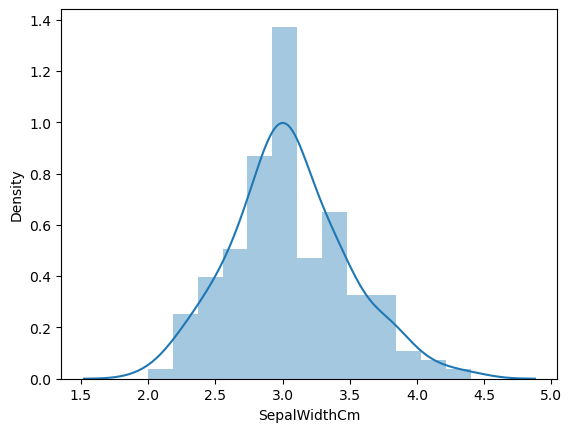

In [13]:
sns.distplot(iris.SepalWidthCm)

In [14]:
#To deal with outliers we can use z-score method as data 
#of sepalwidth is normally distributed


In [15]:
# z-score formula
# zscore= x-mean()/std

In [17]:
iris["sepalwidth_zscore"] = (iris["SepalWidthCm"] - iris["SepalWidthCm"].mean()) / iris["SepalWidthCm"].std()


In [18]:
iris["sepalwidth_zscore"]


0      1.028611
1     -0.124540
2      0.336720
3      0.106090
4      1.259242
         ...   
145   -0.124540
146   -1.277692
147   -0.124540
148    0.797981
149   -0.124540
Name: sepalwidth_zscore, Length: 150, dtype: float64

In [19]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepalwidth_zscore
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.028611
1,2,4.9,3.0,1.4,0.2,Iris-setosa,-0.124540
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.336720
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.106090
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.259242
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,-0.124540
146,147,6.3,2.5,5.0,1.9,Iris-virginica,-1.277692
147,148,6.5,3.0,5.2,2.0,Iris-virginica,-0.124540
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0.797981


In [20]:
iris[iris.sepalwidth_zscore>3]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepalwidth_zscore
15,16,5.7,4.4,1.5,0.4,Iris-setosa,3.104284


In [22]:
iris[iris.sepalwidth_zscore<-3]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepalwidth_zscore


In [23]:
iris.sepalwidth_zscore.describe()

count    1.500000e+02
mean    -6.158037e-16
std      1.000000e+00
min     -2.430844e+00
25%     -5.858010e-01
50%     -1.245404e-01
75%      5.673506e-01
max      3.104284e+00
Name: sepalwidth_zscore, dtype: float64

In [26]:
iris = iris.drop(15)

In [27]:
iris.head(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepalwidth_zscore
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.028611
1,2,4.9,3.0,1.4,0.2,Iris-setosa,-0.124540
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.336720
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.106090
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.259242
5,6,5.4,3.9,1.7,0.4,Iris-setosa,1.951133
6,7,4.6,3.4,1.4,0.3,Iris-setosa,0.797981
7,8,5.0,3.4,1.5,0.2,Iris-setosa,0.797981
8,9,4.4,2.9,1.4,0.2,Iris-setosa,-0.355171
9,10,4.9,3.1,1.5,0.1,Iris-setosa,0.106090


In [28]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 149 non-null    int64  
 1   SepalLengthCm      149 non-null    float64
 2   SepalWidthCm       149 non-null    float64
 3   PetalLengthCm      149 non-null    float64
 4   PetalWidthCm       149 non-null    float64
 5   Species            149 non-null    object 
 6   sepalwidth_zscore  149 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 9.3+ KB


In [29]:
## to delete unnecessary columns

In [30]:
iris.drop(["sepalwidth_zscore"],axis='columns')


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [31]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepalwidth_zscore
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.028611
1,2,4.9,3.0,1.4,0.2,Iris-setosa,-0.124540
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.336720
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.106090
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.259242
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,-0.124540
146,147,6.3,2.5,5.0,1.9,Iris-virginica,-1.277692
147,148,6.5,3.0,5.2,2.0,Iris-virginica,-0.124540
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0.797981


In [32]:
iris.drop(["sepalwidth_zscore"],axis='columns',inplace=True)


In [33]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [35]:
#  'Species' column contains non-numeric values
# Drop the 'Species' column before computing the correlation matrix
iris_numeric = iris.drop(columns=['Species'])
# Now, compute the correlation matrix
correlation_matrix = iris_numeric.corr()

In [36]:
correlation_matrix

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.719722,-0.384079,0.881366,0.899102
SepalLengthCm,0.719722,1.000000,-0.109370,0.875204,0.819851
SepalWidthCm,-0.384079,-0.109370,1.000000,-0.409417,-0.347337
PetalLengthCm,0.881366,0.875204,-0.409417,1.000000,0.962598
PetalWidthCm,0.899102,0.819851,-0.347337,0.962598,1.000000


In [37]:
## to chect corelation of features pictorially we use heatmap


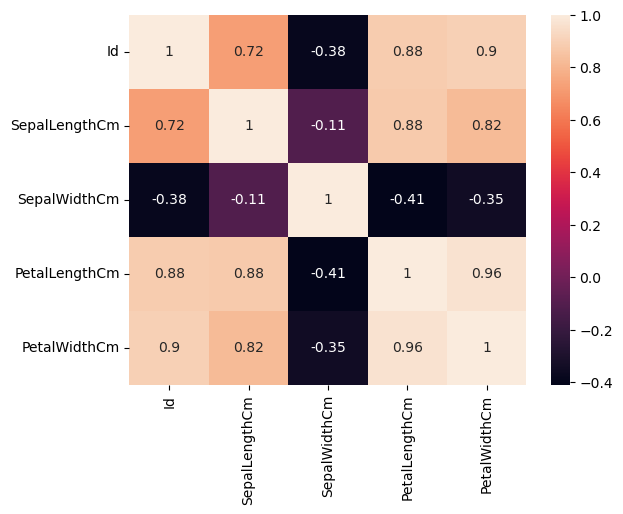

In [41]:
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [44]:
iris.drop(["Id"],axis = "columns" ,inplace =True )

In [45]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Step 4 :

# 1.divide data frame into x and y ie into input and output feature

# 2. Split data using train_test_split

In [46]:
x=iris.iloc[:,0:4] # iris.iloc[:,:-1]


In [47]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [48]:
y= iris.iloc[:,4:5] # iris.iloc[:,-1]

In [49]:
y

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [50]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.2,random_state=2)


In [51]:
xtrain

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
92,5.8,2.6,4.0,1.2
115,6.4,3.2,5.3,2.3
14,5.8,4.0,1.2,0.2
45,4.8,3.0,1.4,0.3
90,5.5,2.6,4.4,1.2
...,...,...,...,...
76,6.8,2.8,4.8,1.4
44,5.1,3.8,1.9,0.4
23,5.1,3.3,1.7,0.5
73,6.1,2.8,4.7,1.2


In [52]:
xtest

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
116,6.5,3.0,5.5,1.8
49,5.0,3.3,1.4,0.2
3,4.6,3.1,1.5,0.2
43,5.0,3.5,1.6,0.6
127,6.1,3.0,4.9,1.8
25,5.0,3.0,1.6,0.2
109,7.2,3.6,6.1,2.5
12,4.8,3.0,1.4,0.1
128,6.4,2.8,5.6,2.1
141,6.9,3.1,5.1,2.3


In [53]:
len(xtest)

30

In [54]:
ytrain

,Species
92,Iris-versicolor
115,Iris-virginica
14,Iris-setosa
45,Iris-setosa
90,Iris-versicolor
...,...
76,Iris-versicolor
44,Iris-setosa
23,Iris-setosa
73,Iris-versicolor


In [55]:
ytest

,Species
116,Iris-virginica
49,Iris-setosa
3,Iris-setosa
43,Iris-setosa
127,Iris-virginica
25,Iris-setosa
109,Iris-virginica
12,Iris-setosa
128,Iris-virginica
141,Iris-virginica


In [56]:
len(ytest)

30

# Step 5: Model selection ie naive bayes

In [57]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [58]:
model.fit(xtrain,ytrain)

C:\Users\alisu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [59]:
ypredict=model.predict(xtest)

In [60]:
ypredict

array(['Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype='<U15')

In [61]:
type(ypredict)

numpy.ndarray

In [62]:
type(ytest)

pandas.core.frame.DataFrame

In [63]:
ytest.values

array([['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-setosa']], dtype=object)

# Step 6  : Model Evaluation
 

In [67]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score ,classification_report 

In [68]:
matrix= confusion_matrix(ytest,ypredict)

In [69]:
matrix

array([[12,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  9]], dtype=int64)

In [70]:
precision=precision_score(ytest,ypredict,average="micro")

In [71]:
precision

1.0

In [72]:
recall=recall_score(ytest,ypredict,average="micro")

In [73]:
recall

1.0

In [74]:
f1_score(ytest,ypredict,average="micro")


1.0

In [76]:
print(classification_report(ytest,ypredict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [77]:
q=[[4.6,3.1,1.5,0.2]]

In [78]:
model.predict(q)


C:\Users\alisu\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype='<U15')

In [79]:
p=[[4.6,3.1,1.5,1.2]]

In [80]:
model.predict(p)


C:\Users\alisu\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['Iris-versicolor'], dtype='<U15')

In [82]:
ytest = ytest.values

In [84]:
ytest

array([['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-setosa']], dtype=object)

In [85]:
from sklearn.naive_bayes import MultinomialNB
modelmulti=MultinomialNB()
modelmulti.fit(xtrain,ytrain)

C:\Users\alisu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [86]:
ypredictmulti=modelmulti.predict(xtest)

In [87]:
ypredictmulti

array(['Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype='<U15')

In [88]:
confusion_matrix(ytest,ypredictmulti)


array([[12,  0,  0],
       [ 0,  8,  1],
       [ 0,  2,  7]], dtype=int64)

In [89]:
print(classification_report(ytest,ypredictmulti))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.80      0.89      0.84         9
 Iris-virginica       0.88      0.78      0.82         9

       accuracy                           0.90        30
      macro avg       0.89      0.89      0.89        30
   weighted avg       0.90      0.90      0.90        30



In [90]:
precision_score(ytest,ypredictmulti,average="micro")

0.9

In [91]:
recall_score(ytest,ypredictmulti,average="micro")

0.9

In [92]:
f1_score(ytest,ypredictmulti,average="micro")


0.9